In [93]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Load original dataset
df = pd.read_csv("Insurance.csv")

# 2. Encode all categorical variables to numeric
df = pd.get_dummies(df, drop_first=True)

# 3. Confirm all dtypes are numeric/bool
print(df.dtypes)  # Double check this output


age                   int64
bmi                 float64
children              int64
charges             float64
sex_male               bool
smoker_yes             bool
region_northwest       bool
region_southeast       bool
region_southwest       bool
dtype: object


In [94]:
X = df.drop(columns=["charges"])
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBRegressor()
model.fit(X_train, y_train)  # 🚨 This line will now work

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [95]:
y_pred = model.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

In [96]:
print(f"MAE: ${mae:.2f}")
print(f"RMSE: ${rmse:.2f}")
print(f"R² Score: {r2:.4f}")

MAE: $2765.75
RMSE: $4840.94
R² Score: 0.8491


In [97]:
print(f"Average Actual Charges in Test Set: ${y_test.mean():.2f}")

Average Actual Charges in Test Set: $12968.32


In [98]:
# smoker_yes = 1 means the person smokes
smoker_avg = df[df["smoker_yes"] == True]["charges"].mean()
nonsmoker_avg = df[df["smoker_yes"] == False]["charges"].mean()

print(f"Smoker Avg Charges: ${smoker_avg:.2f}")
print(f"Non-Smoker Avg Charges: ${nonsmoker_avg:.2f}")

Smoker Avg Charges: $32050.23
Non-Smoker Avg Charges: $8434.27


In [99]:
# male_yes = 1 means the person smokes
male_avg = df[df["sex_male"] == True]["charges"].mean()
female_avg = df[df["sex_male"] == False]["charges"].mean()

print(f"Male Avg Charges: ${male_avg:.2f}")
print(f"Female Avg Charges: ${female_avg:.2f}")

Male Avg Charges: $13956.75
Female Avg Charges: $12569.58


In [100]:
smoker_avg = df[df["smoker_yes"] == True]["charges"].mean()
nonsmoker_avg = df[df["smoker_yes"] == False]["charges"].mean()

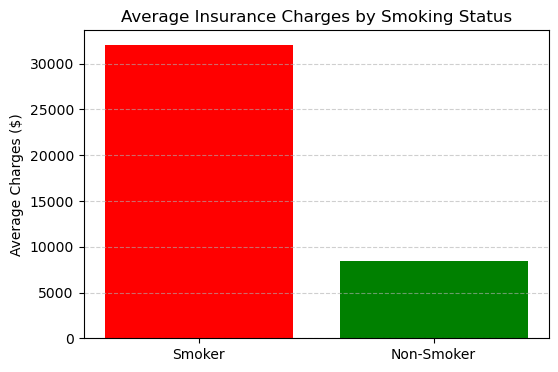

In [101]:
import matplotlib.pyplot as plt

charges_by_smoke = [smoker_avg, nonsmoker_avg]
labels = ['Smoker', 'Non-Smoker']

plt.figure(figsize=(6,4))
plt.bar(labels, charges_by_smoke, color=["red", "green"])
plt.ylabel("Average Charges ($)")
plt.title("Average Insurance Charges by Smoking Status")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [102]:
smoker_group = x_test[x_test["smoker_yes"] == True]
nonsmoker_group = x_test[x_test["smoker_yes"] == False]

In [103]:
smoker_pred = model.predict(smoker_group)
nonsmoker_pred = model.predict(nonsmoker_group)

In [104]:
print(f"Predicted Avg Charges (Smoker): ${smoker_pred.mean():.2f}")
print(f"Predicted Avg Charges (Non-Smoker): ${nonsmoker_pred.mean():.2f}")

Predicted Avg Charges (Smoker): $33377.36
Predicted Avg Charges (Non-Smoker): $7999.45


In [105]:
male_smoker = x_test[(x_test["sex_male"] == True) & (x_test["smoker_yes"] == True)]
male_nonsmoker = x_test[(x_test["sex_male"] == True) & (x_test["smoker_yes"] == False)]
female_smoker = x_test[(x_test["sex_male"] == False) & (x_test["smoker_yes"] == True)]
female_nonsmoker = x_test[(x_test["sex_male"] == False) & (x_test["smoker_yes"] == False)]

In [106]:
pred_male_smoker = model.predict(male_smoker)
pred_male_nonsmoker = model.predict(male_nonsmoker)
pred_female_smoker = model.predict(female_smoker)
pred_female_nonsmoker = model.predict(female_nonsmoker)

In [107]:
print(f"Male Smoker Avg: ${pred_male_smoker.mean():.2f}")
print(f"Male Non-Smoker Avg: ${pred_male_nonsmoker.mean():.2f}")
print(f"Female Smoker Avg: ${pred_female_smoker.mean():.2f}")
print(f"Female Non-Smoker Avg: ${pred_female_nonsmoker.mean():.2f}")

Male Smoker Avg: $34120.20
Male Non-Smoker Avg: $7574.89
Female Smoker Avg: $32376.14
Female Non-Smoker Avg: $8351.43


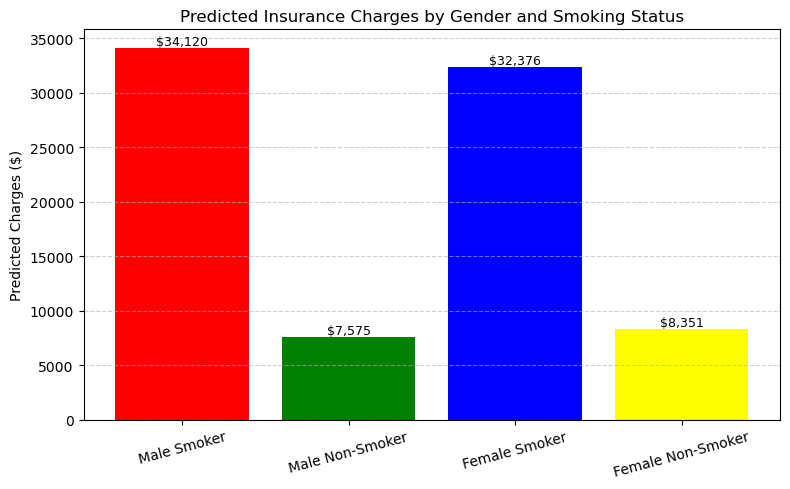

In [129]:
import matplotlib.pyplot as plt

# Step 1: Take the mean of each predicted group
charges_by_smoke = [
    pred_male_smoker.mean(),
    pred_male_nonsmoker.mean(),
    pred_female_smoker.mean(),
    pred_female_nonsmoker.mean()
]

# Step 2: Label all 4 bars
labels = ['Male Smoker', 'Male Non-Smoker', 'Female Smoker', 'Female Non-Smoker']

# Step 3: Plot
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(labels, charges_by_smoke, color=["red", "green", "blue", "yellow"])

# Add data labels on top
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"${height:,.0f}",
        ha='center',
        va='bottom',
        fontsize=9
    )

# Add styling
ax.set_ylabel("Predicted Charges ($)")
ax.set_title("Predicted Insurance Charges by Gender and Smoking Status")
ax.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

In [109]:
smoker_df = df[df["smoker_yes"] == True]  # Only smokers

In [110]:
avg_bmi_smokers = df[df["smoker_yes"] == True]["bmi"].mean()
avg_bmi_nonsmokers = df[df["smoker_yes"] == False]["bmi"].mean()
print(f"Average BMI for Smokers: {avg_bmi_smokers:.2f}")
print(f"Average BMI for Non Smokers: {avg_bmi_nonsmokers:.2f}")

Average BMI for Smokers: 30.71
Average BMI for Non Smokers: 30.65


In [111]:
def classify_bmi(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif bmi < 25:
        return "Normal"
    elif bmi < 30:
        return "Overweight"
    else:
        return "Obese"

df["bmi_group"] = df["bmi"].apply(classify_bmi)


In [112]:
print(df.groupby("bmi_group")["charges"].mean())

bmi_group
Normal         10409.337709
Obese          15552.335469
Overweight     10987.509891
Underweight     8852.200585
Name: charges, dtype: float64


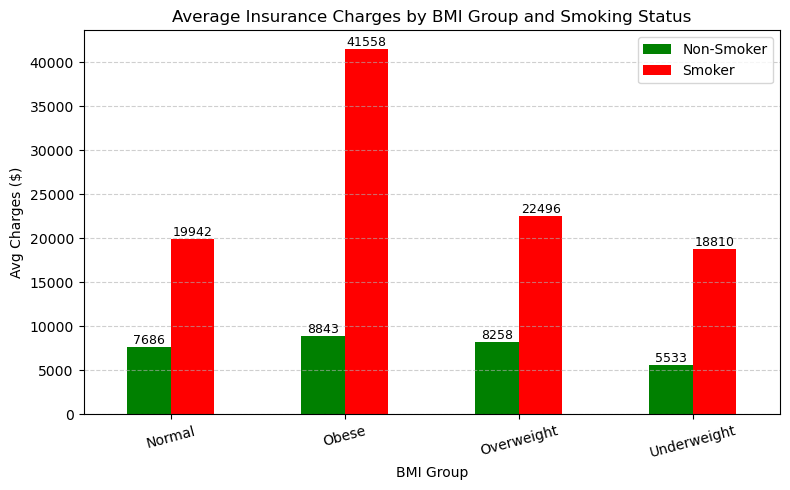

In [116]:
# Plot the chart
ax = bmi_smoke_data.plot(kind="bar", figsize=(8, 5), color=["green", "red"])
plt.title("Average Insurance Charges by BMI Group and Smoking Status")
plt.ylabel("Avg Charges ($)")
plt.xlabel("BMI Group")
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(["Non-Smoker", "Smoker"])
plt.tight_layout()

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', fontsize=9)

plt.show()

In [117]:
def classify_age(age):
    if age < 30:
        return "Young Adult"
    elif age < 45:
        return "Adult"
    elif age < 60:
        return "Mid-Age"
    else:
        return "Senior"

df["age_group"] = df["age"].apply(classify_age)

In [118]:
print("Average Charges by Age Group and Smoking Status:")
print(df.groupby(["age_group", "smoker_yes"])["charges"].mean())

Average Charges by Age Group and Smoking Status:
age_group    smoker_yes
Adult        False          6945.331654
             True          30833.987732
Mid-Age      False         11871.666138
             True          35889.869079
Senior       False         15232.709480
             True          40630.695190
Young Adult  False          4418.568274
             True          27518.035262
Name: charges, dtype: float64


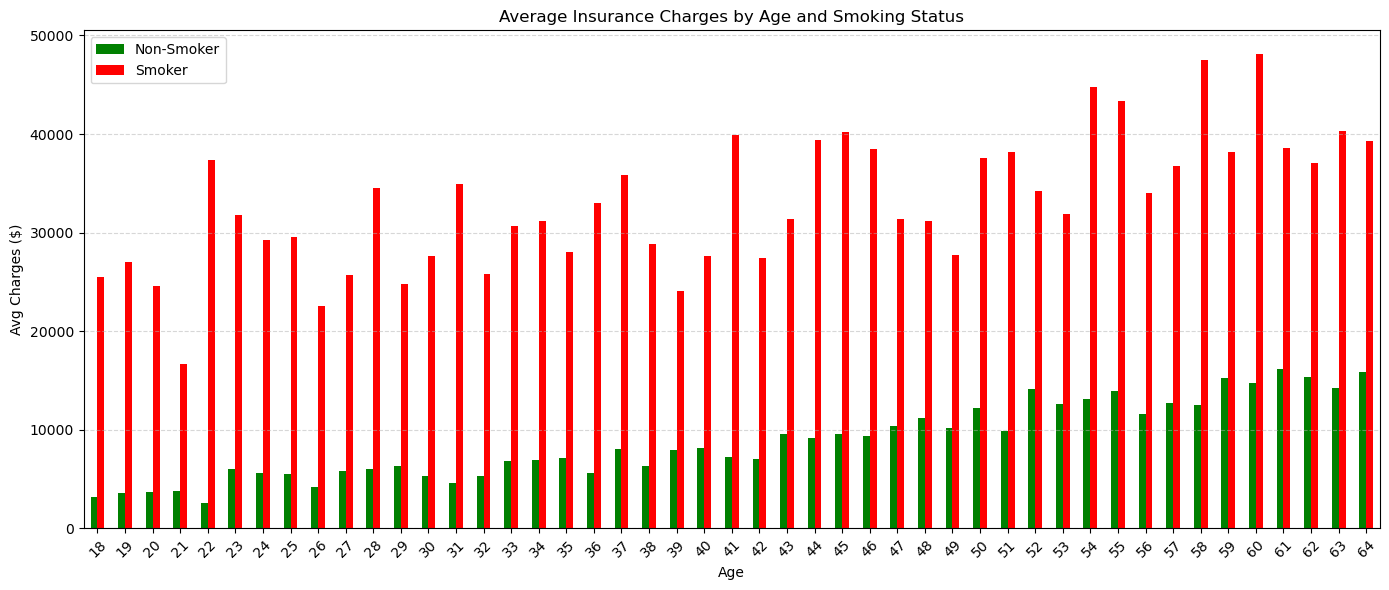

In [127]:
import matplotlib.pyplot as plt

# Group by age and smoker, get average charges
age_smoke_avg = df.groupby(["age", "smoker_yes"])["charges"].mean().unstack()

# Plot as bar chart
age_smoke_avg.plot(kind="bar", figsize=(14, 6), color=["green", "red"])

# Add chart styling
plt.title("Average Insurance Charges by Age and Smoking Status")
plt.xlabel("Age")
plt.ylabel("Avg Charges ($)")
plt.xticks(rotation=45)
plt.legend(["Non-Smoker", "Smoker"])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [123]:
# Predict future years (2024–2026)
future_profiles = pd.DataFrame({
    "age": [45, 46, 47],
    "bmi": [32, 32, 32],
    "children": [2, 2, 2],
    "sex_male": [True, True, True],
    "smoker_yes": [True, True, True],
    "region_northwest": [False, False, False],
    "region_southeast": [True, True, True],
    "region_southwest": [False, False, False],
})

years = [2024, 2025, 2026]

# Predict charges using your model
base_predictions = model.predict(future_profiles)

# Apply 5% inflation to 2025 and 2026
adjusted_predictions = [
    base_predictions[0],                         # 2024 (no inflation yet)
    base_predictions[0] * 1.05,                  # 2025 (5% increase)
    base_predictions[0] * 1.05 * 1.05             # 2026 (5% compound increase)
]

Inflation-Adjusted Charges for 2024: $40489.11
Inflation-Adjusted Charges for 2025: $42513.56
Inflation-Adjusted Charges for 2026: $44639.24


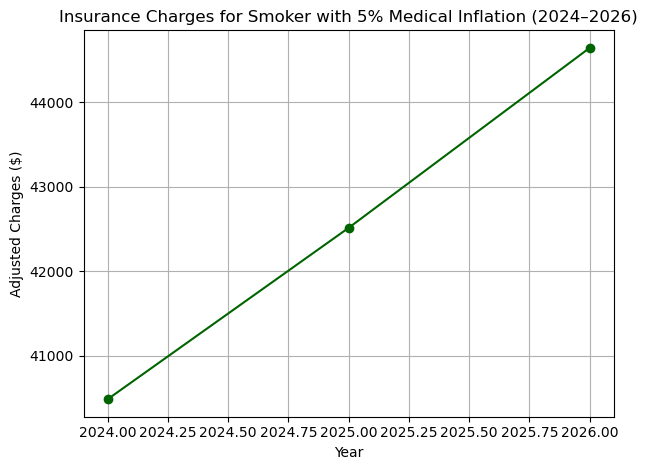

In [124]:
# Print results
for year, charge in zip(years, adjusted_predictions):
    print(f"Inflation-Adjusted Charges for {year}: ${charge:.2f}")

# Plot
import matplotlib.pyplot as plt

plt.plot(years, adjusted_predictions, marker='o', color='darkgreen')
plt.title("Insurance Charges for Smoker with 5% Medical Inflation (2024–2026)")
plt.xlabel("Year")
plt.ylabel("Adjusted Charges ($)")
plt.grid(True)
plt.tight_layout()
plt.show()